In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Semicírculo azul
def c1(x, y):
    if (x + 1)**2 + y**2 <= 1:
      return 1
    else:
      return 0

#Sermicírculo verde
def c2(x, y):
    if (x - 1)**2 + y**2 <= 1:
      return 1
    else:
      return 0

#Semicírculo amarelo
def c3(x, y):
    if x**2 + (y + 1)**2 <= 1:
      return 1
    else:
      return 0

#Semicírculo vermelha=o
def c4(x, y):
    if x**2 + (y - 1)**2 <= 1:
      return 1
    else:
      return 0

x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

points = np.vstack(list(zip(x.ravel(), y.ravel())))

lista = []
for x_i, y_i in points:
  if c1(x_i, y_i) + c4(x_i, y_i) == 2:
    lista.append(1)
  elif c2(x_i, y_i) + c4(x_i, y_i) == 2:
    lista.append(2)
  elif c2(x_i, y_i) + c3(x_i, y_i) == 2:
    lista.append(3)
  elif c1(x_i, y_i) + c3(x_i, y_i) == 2:
    lista.append(4)
  else:
    lista.append(0)

labels = np.array(lista)

x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels)

mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(5, activation='softmax')
])

mlp.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

history = mlp.fit(
    x_train, y_train.reshape((-1,1)),
    validation_split=0.1,
    batch_size=10,
    epochs=2000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

predictions = [np.argmax(p) for p in mlp.predict(x_test)]

Epoch 1/2000
720/720 [==============================] - 8s 8ms/step - loss: 0.7157 - acc: 0.6782 - val_loss: 0.4518 - val_acc: 0.8025 - lr: 0.0010
Epoch 2/2000
720/720 [==============================] - 3s 4ms/step - loss: 0.3441 - acc: 0.8617 - val_loss: 0.3120 - val_acc: 0.8712 - lr: 0.0010
Epoch 3/2000
720/720 [==============================] - 4s 5ms/step - loss: 0.2661 - acc: 0.8974 - val_loss: 0.2357 - val_acc: 0.9112 - lr: 0.0010
Epoch 4/2000
720/720 [==============================] - 5s 7ms/step - loss: 0.2204 - acc: 0.9128 - val_loss: 0.2167 - val_acc: 0.9062 - lr: 0.0010
Epoch 5/2000
720/720 [==============================] - 2s 3ms/step - loss: 0.1873 - acc: 0.9301 - val_loss: 0.1904 - val_acc: 0.9225 - lr: 0.0010
Epoch 6/2000
720/720 [==============================] - 1s 2ms/step - loss: 0.1722 - acc: 0.9319 - val_loss: 0.1806 - val_acc: 0.9262 - lr: 0.0010
Epoch 7/2000
720/720 [==============================] - 1s 2ms/step - loss: 0.1596 - acc: 0.9378 - val_loss: 0.2007 - 

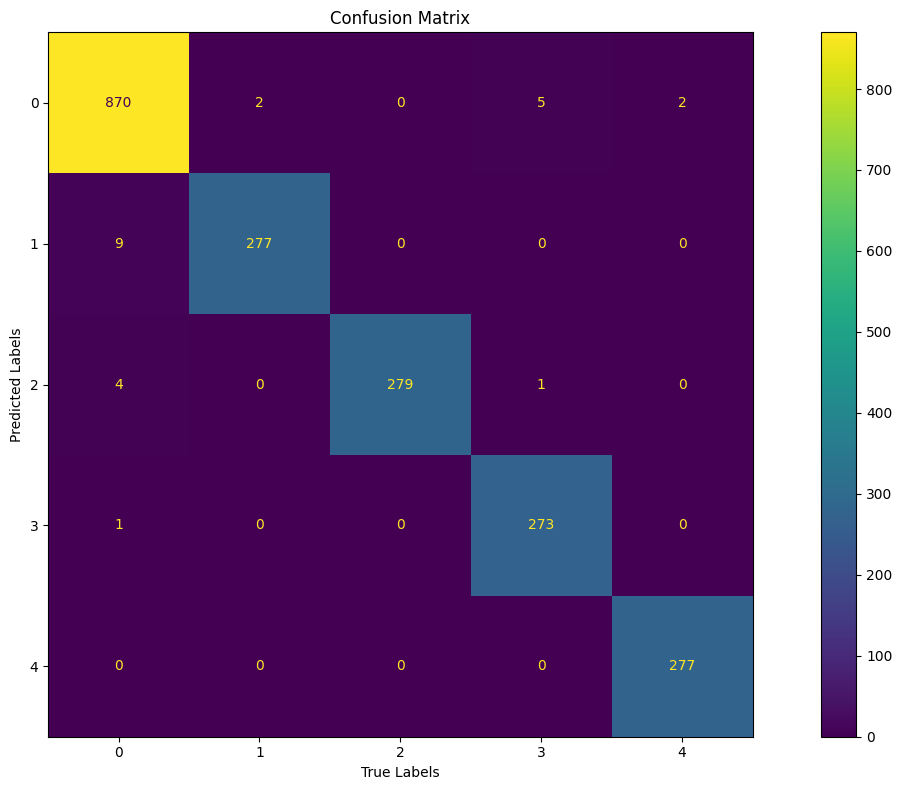

In [3]:
fig, ax = plt.subplots(figsize=(14, 8))

ConfusionMatrixDisplay(confusion_matrix(predictions, y_test)).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.tight_layout()
plt.show()